# GIS Data Type - Vector Data & Raster Data

Author: Fangzheng Lyu

In Geographic Information Science (GIS), data types refer to the different ways in which geographic data can be represented and stored. The two main data types in GIS are:

<b>Vector Data</b> represents geographic features as points, lines, and polygons.
- <b>Point Data</b> are used to represent discrete locations, such as cities, landmarks, or specific coordinates.
- <b>Line Data</b> are used to represent linear features, such as roads, rivers.
- <b>Polygons</b> are used to represent areas or regions, such as countries, states, or land parcels.


<b>Raster Data</b> represents geographic information as a grid of cells or pixels, where each cell contains a value.
- <b>Continuous Raster Data</b> are used to represent continuous surfaces or phenomena, such as elevation, temperature, or satellite imagery.
- <b>Discrete Raster Data</b> are used to represent discrete rasters that have a specific theme or class, and each pixel is assigned to a specific class such as land cover/land use map.


## Notebook Outline
- [Vector Data](#vector)
    - [Point Data](#point)
    - [Line Data](#line)
    - [Polygon Data](#polygon)
- [Raster Data](#raster)
    - [Continuous Raster Data](#continuous)
    - [Discrete Raster Data](#discrete)

In [1]:
!pip install geopandas==0.13.2

Defaulting to user installation because normal site-packages is not writeable


In [2]:
## Import Library
import pytz
from datetime import datetime, timedelta
import os
import geopandas as gpd
import json
from shapely.geometry import Polygon, Point, MultiPolygon
import shapefile
import re
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import matplotlib.colors as mcolors
import numpy as np
import random
import csv
from urllib.request import urlopen

/tmp/ipykernel_1323/3328501683.py:5: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


<a id='vector'></a>

## 1. Vector Data

Vector data in GIS (Geographic Information Systems) refers to the digital representation of geographic features using geometrical primitives such as points, lines, and polygons. Unlike raster data, which represents spatial data as a grid of cells or pixels, vector data stores the precise coordinates of the vertices that define the shape and location of geographic features.

<a id='point'></a>

### 1.1. Point Data

### Twitter Data as Point Data

In [3]:
## Use an example, could add more if you want to involves more social media data
filelist = ['250000-tweets-2021-09-25_01-48-23.json']

In [4]:
## Use the file on 

## Create a dictionary for storing all Twitter with index = GEOID

point_data = []
polygon_data = []

# Opening JSON file
for filename in filelist:
    filepath = "./data/"+filename
    print(filepath)
    #print(len(heat_twitter))
    f = open(filepath)
    data = json.load(f)
    
    
    for i in range(0, len(data)):
        #if (i%50000 == 0):
        #    print(i)
        try:
            
            ##Need to deal with case when the shapefile is too big
            text = data[i]["text"]
            exact_loc = -1
            ## Case 1
            ## Twitter with exact geospatial location
            if (data[i]['geo']!=None):
                lat = data[i]['geo']['coordinates'][0]
                lon = data[i]['geo']['coordinates'][1]
                exact_loc = Point(lon, lat)
                point_data.append(exact_loc)
            elif (data[i]['place']!=None):
                ## Twitter with a polygon bounding box
                ## We check which county the centroid of the point lies in
                poly = MultiPolygondata[i]['place']['bounding_box']["coordinates"][0]
                polygon_data.append(poly)
        except:
            ## no geographical location
            pass
    # Closing file
    f.close()

./data/250000-tweets-2021-09-25_01-48-23.json


In [5]:
len(point_data)

19081

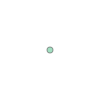

In [6]:
point_data[0]

In [7]:
point_data[0].x, point_data[0].y

(76.1167, 31.6833)

<a id='line'></a>

### 1.2. Line Data

### US Primary Road Network

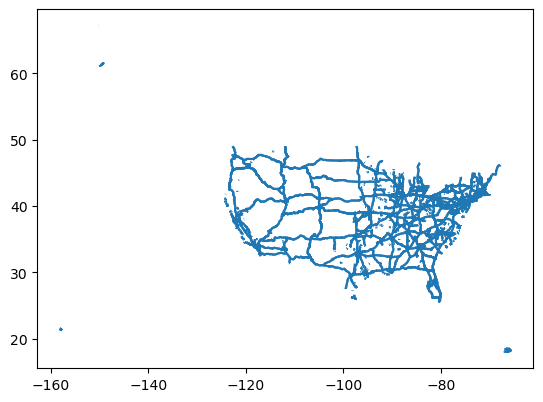

In [8]:
url_road = r'https://www2.census.gov/geo/tiger/TIGER2019/PRIMARYROADS/tl_2019_us_primaryroads.zip'
road = gpd.read_file(url_road)
road.plot()
plt.show()

In [9]:
road

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,1104430641961,State Hwy 42,S,S1100,"LINESTRING (-89.34466 31.35903, -89.34374 31.3..."
1,1104430639695,State Hwy 42,S,S1100,"LINESTRING (-89.32506 31.37999, -89.32826 31.3..."
2,1108296451323,State Hwy 67,S,S1100,"LINESTRING (-88.49978 43.14901, -88.49788 43.1..."
3,1108296451337,State Hwy 67,S,S1100,"LINESTRING (-88.49978 43.14878, -88.49820 43.1..."
4,1109097223373,State Hwy 114,S,S1100,"LINESTRING (-97.18355 32.98982, -97.18214 32.9..."
...,...,...,...,...,...
17490,11013473368094,I- 25 (Express Lanes),I,S1100,"LINESTRING (-105.00571 39.76043, -105.00484 39..."
17491,1104271365671,I- 25 (Express Lanes),I,S1100,"LINESTRING (-104.98859 39.79109, -104.98831 39..."
17492,1109094380320,Homestead Extension of Florida's Tpke,M,S1100,"LINESTRING (-80.34125 25.95717, -80.34196 25.9..."
17493,1108296486865,Homestead Extension of Florida's Tpke,M,S1100,"LINESTRING (-80.34088 25.95715, -80.33988 25.9..."


In [10]:
hwy42 = road[road["LINEARID"]=="1104430641961"]
hwy42

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,1104430641961,State Hwy 42,S,S1100,"LINESTRING (-89.34466 31.35903, -89.34374 31.3..."


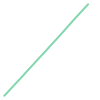

In [11]:
hwy42["geometry"][0]

In [12]:
print(hwy42["geometry"][0])

LINESTRING (-89.34465799999998 31.359033, -89.34374299999999 31.35998, -89.34303299999999 31.360754, -89.34261999999998 31.361196999999997, -89.342286 31.361564999999988, -89.34208199999999 31.361791999999998, -89.34180599999999 31.362078999999998, -89.34114799999999 31.362763999999988, -89.34049899999998 31.363471999999998, -89.33897199999998 31.365164999999998, -89.33882199999998 31.365331999999988, -89.33819099999998 31.36600299999999, -89.33790799999998 31.36631099999999, -89.33656599999999 31.367777, -89.336534 31.367811999999997, -89.336455 31.367898999999998, -89.33639999999998 31.36796, -89.33634399999998 31.368020999999988, -89.335633 31.368783999999998, -89.33548799999998 31.36894099999999, -89.33485999999999 31.369601999999997, -89.33396899999998 31.37060299999999, -89.33318899999999 31.371455999999988, -89.332363 31.372335999999997, -89.332104 31.37261099999999, -89.32846099999999 31.376715999999988, -89.32508699999998 31.38036999999999)


<a id='polygon'></a>

### 1.3. Polygon Data

### US County Shapefile as Polygon Data

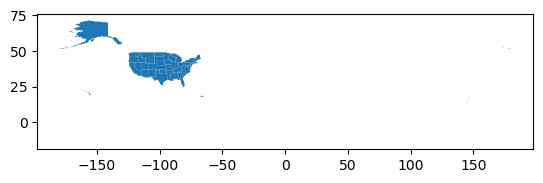

In [13]:
url_states = r'https://www2.census.gov/geo/tiger/TIGER2019/STATE/tl_2019_us_state.zip'
states = gpd.read_file(url_states)
states.plot()
plt.show()

<Axes: >

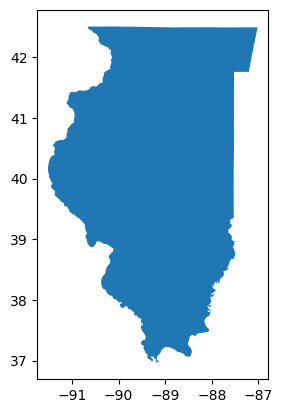

In [14]:
## look into the shape for states Illinois
states[states["GEOID"] == "17"].plot()

<a id='raster'></a>

## 2. Raster Data

Raster data in GIS (Geographic Information Systems) refers to the digital representation of spatial data as a grid of cells or pixels, with each cell containing a value that represents a specific geographic information or attribute. Raster data is typically used to represent continuous geographic phenomena, such as elevation, land cover, temperature, or remotely sensed imagery. The key characteristics of raster data include:

<a id='continuous'></a>

### 2.1. Continuous Raster Data

### Continuous Data

In [15]:
df = pd.read_csv('./human_sentiments_of_heat/1km_chicago_heat_exposure.csv')
df

,Unnamed: 0,lon,lat,val
0,0,-87.545366,41.644595,0.269728
1,1,-87.533171,41.644595,0.279292
2,2,-87.618537,41.653604,0.340616
3,3,-87.606341,41.653604,0.291826
4,4,-87.594146,41.653604,0.302488
...,...,...,...,...
588,588,-87.777073,42.013964,0.366731
589,589,-87.703902,42.013964,0.252858
590,590,-87.691707,42.013964,0.287384
591,591,-87.679512,42.013964,0.264091


array([<Axes: xlabel='lon', ylabel='lat'>], dtype=object)

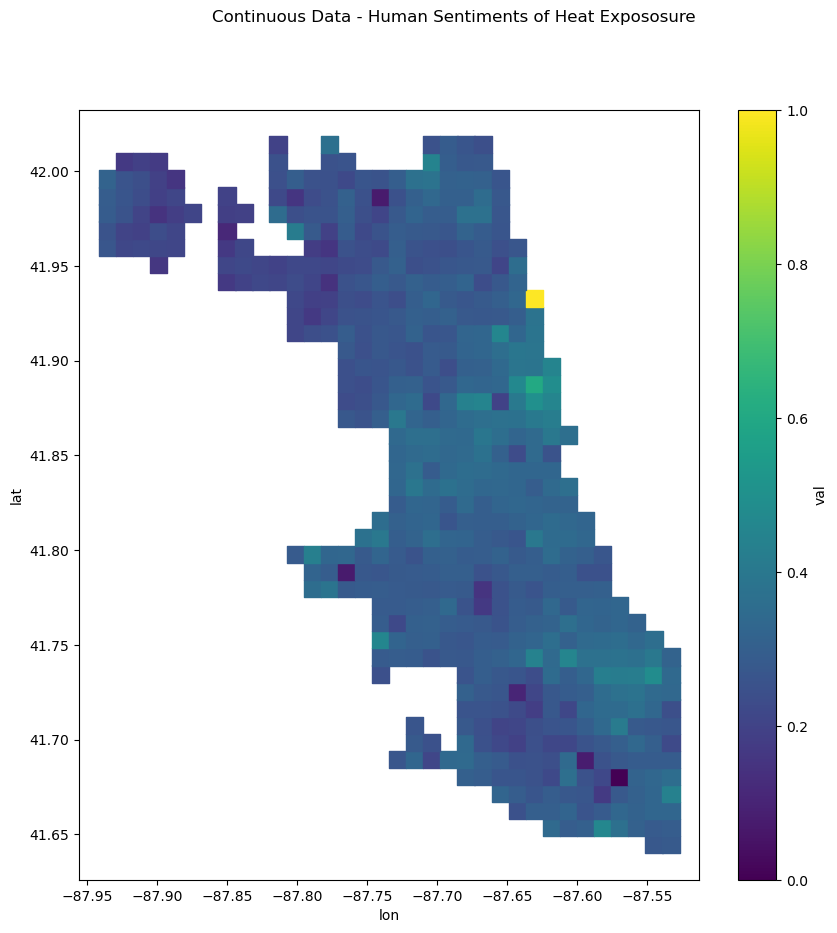

In [16]:
df.plot.scatter(title='Continuous Data - Human Sentiments of Heat Expososure', x='lon', y='lat', c='val', figsize = [10,10], subplots=True, marker="s", s = 155, colormap='viridis')

<a id='discrete'></a>

### 2.2. Discrete Raster Data

### Discrete Data

Define 4 types of data by the value of normalized heat exposure (NHE)
- Type I -> NHE<=0.25
- Type II -> 0.25<NHE<=0.5
- Type III -> 0.5<NHE<=0.75
- Type IV -> 0.75<NHE

In [17]:
tp = []
val = list(df['val'])
for ele in val:
    if (ele<=0.25):
        tp.append("Type I")
    elif (ele<=0.5):
        tp.append("Type II")
    elif (ele<=0.75):
        tp.append("Type III")
    else:
        tp.append("Type IV")

In [18]:
df["type"] = tp

In [19]:
df

,Unnamed: 0,lon,lat,val,type
0,0,-87.545366,41.644595,0.269728,Type II
1,1,-87.533171,41.644595,0.279292,Type II
2,2,-87.618537,41.653604,0.340616,Type II
3,3,-87.606341,41.653604,0.291826,Type II
4,4,-87.594146,41.653604,0.302488,Type II
...,...,...,...,...,...
588,588,-87.777073,42.013964,0.366731,Type II
589,589,-87.703902,42.013964,0.252858,Type II
590,590,-87.691707,42.013964,0.287384,Type II
591,591,-87.679512,42.013964,0.264091,Type II


array([<Axes: xlabel='lon', ylabel='lat'>], dtype=object)

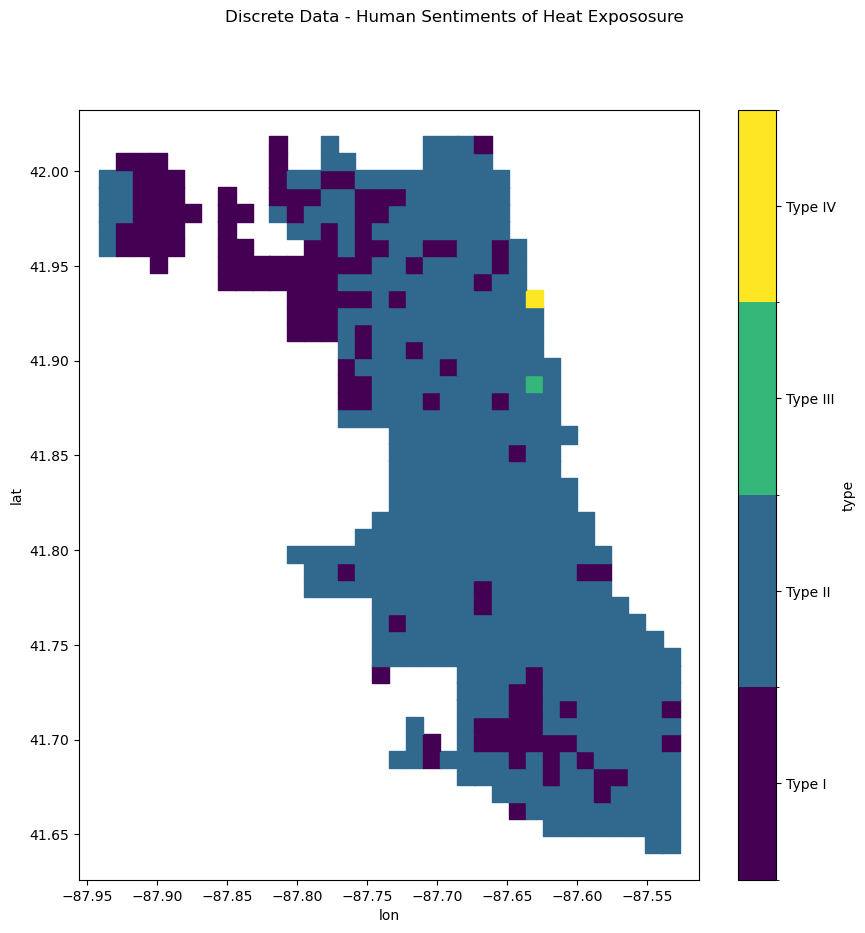

In [20]:
import plotly.express as px
df["type"] = df["type"].astype("category")

df.plot.scatter(title='Discrete Data - Human Sentiments of Heat Expososure', x='lon', y='lat', c='type', figsize = [10,10], subplots=True, marker="s", s = 155, colormap='viridis')